In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt_FULLDATA_HIGHNOISE import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [5]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDimsHighNoise/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file and "MSEs" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0).dropna()
    print(mses)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

              bw            mse
0       0.000282  309941.562500
1       0.000372  309931.781250
2       0.000491  309941.562500
3       0.000649  309941.562500
4       0.000857  309941.562500
5       0.001131  309941.031250
6       0.001493  309941.031250
7       0.001972  309938.281250
8       0.002603  309937.656250
9       0.003437  309928.750000
10      0.004538  309920.281250
11      0.005992  309904.250000
12      0.007912  309880.437500
13      0.010446  309843.937500
14      0.013793  309782.500000
15      0.018211  309687.375000
16      0.024046  309528.875000
17      0.031749  309253.937500
18      0.041919  308763.000000
19      0.055348  307861.187500
20      0.073079  306118.593750
21      0.096490  302993.093750
22      0.127401  297741.937500
23      0.168214  288767.875000
24      0.222102  273358.062500
25      0.293252  247068.125000
26      0.387196  203220.609375
27      0.511235  136160.046875
28      0.675010   58561.359375
29      0.891251   12584.164062
30      

Text(0.5, 1.0, 'Minimum MSE is (3499.4836, 31)')

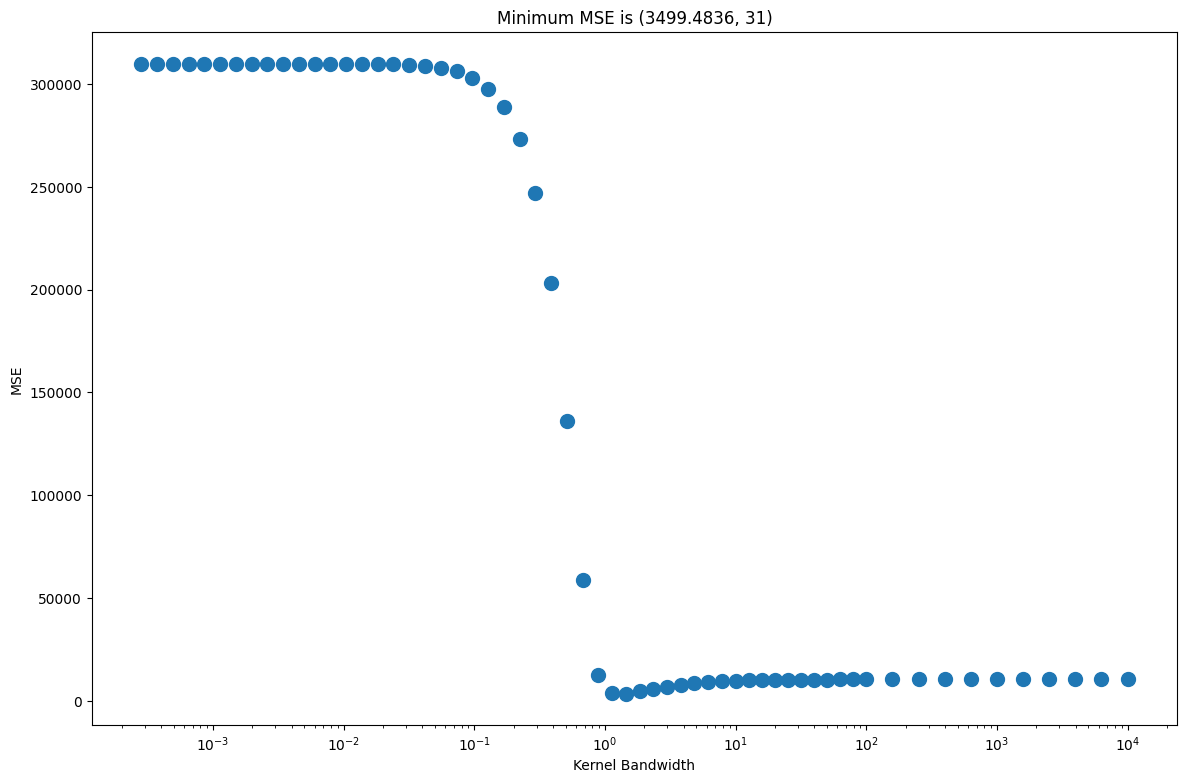

In [6]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")

In [7]:
print(mses)

              bw            mse
0       0.000282  309941.562500
1       0.000372  309931.781250
2       0.000491  309941.562500
3       0.000649  309941.562500
4       0.000857  309941.562500
5       0.001131  309941.031250
6       0.001493  309941.031250
7       0.001972  309938.281250
8       0.002603  309937.656250
9       0.003437  309928.750000
10      0.004538  309920.281250
11      0.005992  309904.250000
12      0.007912  309880.437500
13      0.010446  309843.937500
14      0.013793  309782.500000
15      0.018211  309687.375000
16      0.024046  309528.875000
17      0.031749  309253.937500
18      0.041919  308763.000000
19      0.055348  307861.187500
20      0.073079  306118.593750
21      0.096490  302993.093750
22      0.127401  297741.937500
23      0.168214  288767.875000
24      0.222102  273358.062500
25      0.293252  247068.125000
26      0.387196  203220.609375
27      0.511235  136160.046875
28      0.675010   58561.359375
29      0.891251   12584.164062
30      